# 1961 - 1990  for the radiation
# 1981 - 2000
# 1991 -2020

leidinicesilva@gmail.com

# LAB Exercises

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd


# TOA Net outgoing longwave

In [2]:
ds = xr.open_dataset('global_longwave.nc')
ds

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 1975-12-16T06:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_tnlwrf       (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 16:56:29 2025: cdo timmean longwave_y...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [3]:
outcome = ds['avg_tnlwrf'] * -1
outcome

<xarray.DataArray 'avg_tnlwrf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
array([[[192.04578, 192.04578, 192.04578, ..., 192.04578, 192.04578,
         192.04578],
        [192.09586, 192.09604, 192.09625, ..., 192.09615, 192.09604,
         192.09587],
        [192.20375, 192.20396, 192.20432, ..., 192.20433, 192.2042 ,
         192.20413],
        ...,
        [146.16579, 146.1666 , 146.16782, ..., 146.16577, 146.16635,
         146.16634],
        [146.00157, 146.00262, 146.00365, ..., 146.001  , 146.0011 ,
         146.00139],
        [145.41286, 145.41286, 145.41286, ..., 145.41286, 145.41286,
         145.41286]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 1975-12-16T06:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0

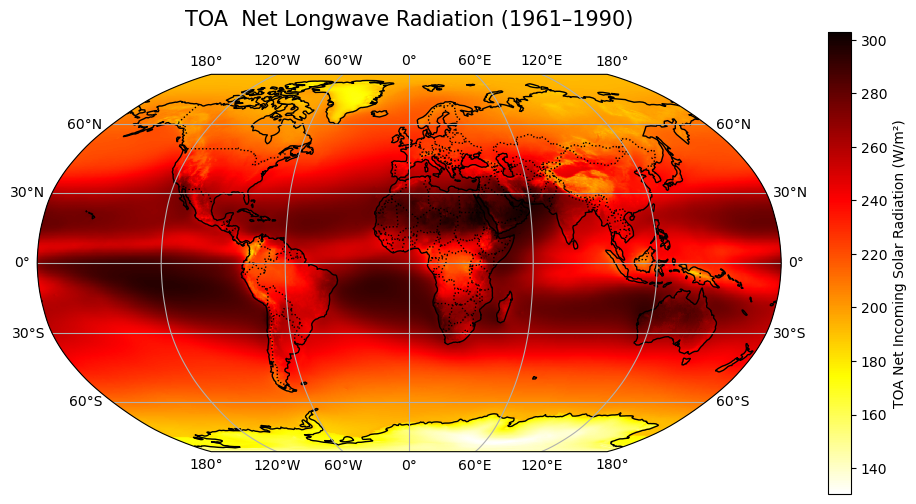

In [4]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

outcome.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="hot_r", cbar_kwargs={"label": "TOA Net Incoming Solar Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title("TOA  Net Longwave Radiation (1961–1990)", fontsize=15, pad=20)

# Save the plot
plt.savefig("TOA  Net Longwave Radiation.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# TOA Shortwave Incoming Solar Radiation

In [5]:
sh = xr.open_dataset('global_TOA_solar.nc')
sh

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_tnswrf       (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 19:03:12 2025: cdo timmean TOA_solar_...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [6]:
toa_s = sh['avg_tnswrf']
toa_s

<xarray.DataArray 'avg_tnswrf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes: (12/33)
    standard_name:                            unknown
    long_name:                                Time-mean top net short-wave ra...
    units:                                    W m**-2
    cell_methods:                             valid_time: mean
    GRIB_paramId:                             235039
    GRIB_dataType:                            fc
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean top net short-wave ra...
    GRIB_shortName:                           avg_tnswrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

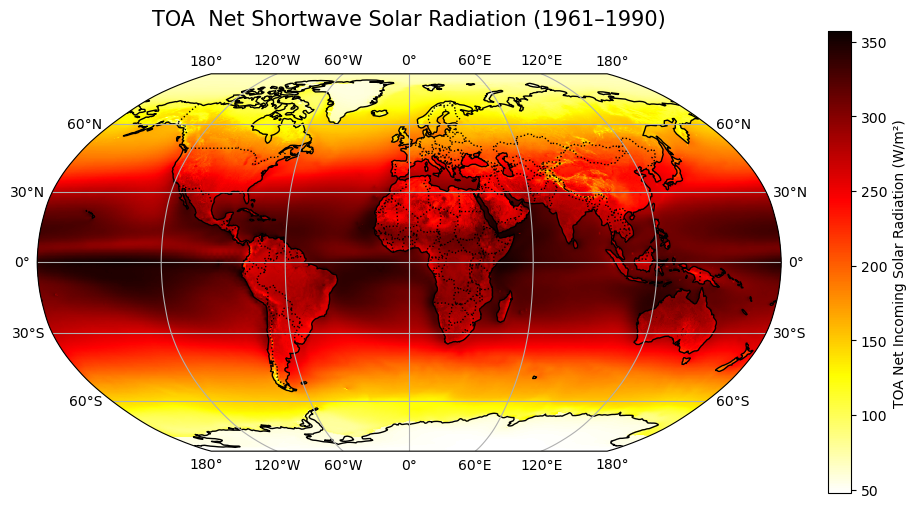

In [7]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

toa_s.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="hot_r", cbar_kwargs={"label": "TOA Net Incoming Solar Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title("TOA  Net Shortwave Solar Radiation (1961–1990)", fontsize=15, pad=20)

# Save the plot
plt.savefig("TOA  Net Solar Radiation.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Net_surface Radiation (Rs)

In [8]:
sur = xr.open_dataset('Net_surface_rad.nc')
sur

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_snswrf       (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 17:51:56 2025: cdo timmean Net_surfac...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [9]:
surface_rs = sur['avg_snswrf'] 
surface_rs

<xarray.DataArray 'avg_snswrf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes: (12/33)
    standard_name:                            unknown
    long_name:                                Time-mean surface net short-wav...
    units:                                    W m**-2
    cell_methods:                             valid_time: mean
    GRIB_paramId:                             235037
    GRIB_dataType:                            fc
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean surface net short-wav...
    GRIB_shortName:                           avg_snswrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

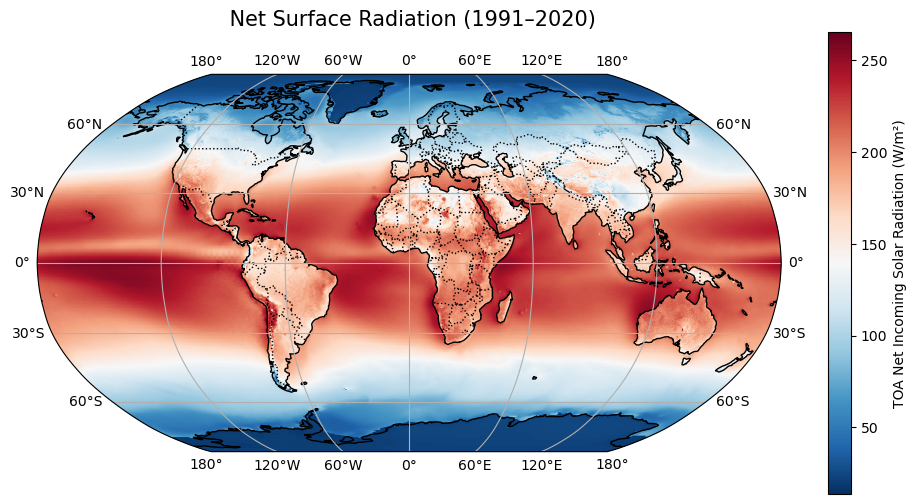

In [10]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

surface_rs.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r" , cbar_kwargs={"label": "TOA Net Incoming Solar Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title(" Net Surface Radiation (1991–2020)", fontsize=15, pad=20)

# Save the plot
plt.savefig("Net Surface Radiation.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Latent Heat flux

In [11]:
data = xr.open_dataset('global_latentheat.nc')
data

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_slhtf        (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 18:39:55 2025: cdo timmean lateheat_y...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [12]:
latent = data['avg_slhtf'] * -1
latent

<xarray.DataArray 'avg_slhtf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
array([[[ 4.596852  ,  4.596852  ,  4.596852  , ...,  4.596852  ,
          4.596852  ,  4.596852  ],
        [ 4.5238266 ,  4.523978  ,  4.5242605 , ...,  4.5241523 ,
          4.5241737 ,  4.524109  ],
        [ 4.6044474 ,  4.605315  ,  4.60614   , ...,  4.603666  ,
          4.603471  ,  4.6039267 ],
        ...,
        [-0.29772288, -0.297788  , -0.29787478, ..., -0.29741907,
         -0.29752758, -0.2976578 ],
        [-0.29407704, -0.29418555, -0.29429406, ..., -0.29396853,
         -0.29392514, -0.29390344],
        [-0.28381228, -0.28381228, -0.28381228, ..., -0.28381228,
         -0.28381228, -0.28381228]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0

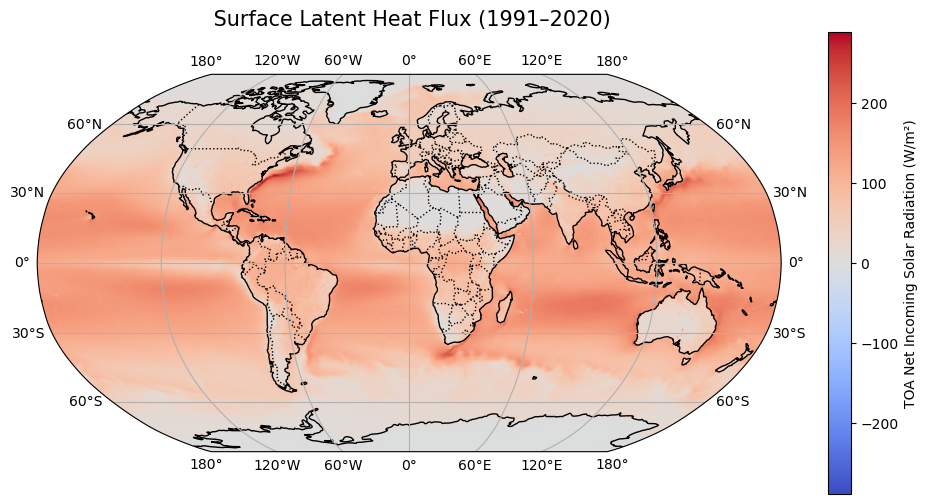

In [13]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

latent.plot(ax=ax, transform=ccrs.PlateCarree(), cmap= "coolwarm", cbar_kwargs={"label": "TOA Net Incoming Solar Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title(" Surface Latent Heat Flux (1991–2020)", fontsize=15, pad=20)

# Save the plot
plt.savefig("Surface Latent Heat Flux.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Sensible Heat Flux

In [14]:
sens =  xr.open_dataset("global_sensible.nc")
sens

<xarray.Dataset> Size: 4MB
Dimensions:          (valid_time: 1, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude        (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude         (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16B ...
    avg_ishf         (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.4.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    frequency:               year
    history:                 Fri Mar 21 18:48:39 2025: cdo timmean sensible_y...
    CDO:                     Climate Data Operators version 2.4.4 (https://mp...

In [15]:
sensible = sens['avg_ishf'] * -1
sensible

<xarray.DataArray 'avg_ishf' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
array([[[ -2.0672076,  -2.0672076,  -2.0672076, ...,  -2.0672076,
          -2.0672076,  -2.0672076],
        [ -2.002939 ,  -2.000888 ,  -1.998794 , ...,  -2.0060856,
          -2.0049462,  -2.0039914],
        [ -1.897416 ,  -1.8948009,  -1.8911225, ...,  -1.9017236,
          -1.8997705,  -1.8982948],
        ...,
        [-18.347254 , -18.354687 , -18.363724 , ..., -18.324022 ,
         -18.331585 , -18.339277 ],
        [-17.64082  , -17.646147 , -17.651495 , ..., -17.629946 ,
         -17.63356  , -17.637184 ],
        [-16.115568 , -16.115568 , -16.115568 , ..., -16.115568 ,
         -16.115568 , -16.115568 ]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2005-12-15T18:00:00
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0

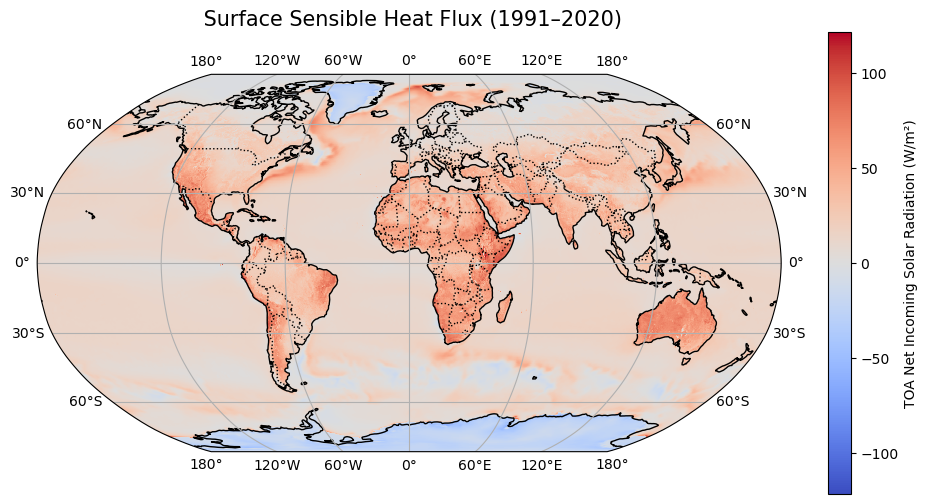

In [16]:
# Create the plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

sensible.plot(ax=ax, transform=ccrs.PlateCarree(), cmap= "coolwarm", cbar_kwargs={"label": "TOA Net Incoming Solar Radiation (W/m²)"})
# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Add gridlines
ax.gridlines(draw_labels=True)

# Add title
plt.title(" Surface Sensible Heat Flux (1991–2020)", fontsize=15, pad=20)

# Save the plot
plt.savefig("Surface Sensible Heat Flux.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Seasonal Variation of the Surface Energy Balance

### Shell Script for Data Processing

This script processes climate data files to extract specific variables, calculate ground heat storage, and compute monthly means. The steps are as follows:

1. Extract data for a Savanah region in Ghana (latitude: 9.08333300, longitude: -1.81666700).
2. Calculate ground heat storage (GH = Rs - Lh - Sh).
3. Compute monthly means for each variable.

In [18]:
%%bash

# Input files for each variable
rs_file="Net_surface.nc"  # Solar Radiation (avg_snswrf)
lh_file="Net_latentheat.nc"  # Latent Heat Flux (avg_slhtf)
sh_file="Net_sensible.nc"  # Sensible Heat Flux (avg_ishf)

# Output directory for saving processed files
output_dir="output_files"
mkdir -p "$output_dir"

#  Extract data for the specific point (latitude: 9.08333300, longitude: -1.81666700)
savannah_rs="${output_dir}/savannah_rs.nc"
cdo -remapnn,lon=-1.8166670_lat=9.08333300 "$rs_file" "$savannah_rs"

savannah_lh="${output_dir}/savannah_lh.nc"
cdo -remapnn,lon=-1.8166670_lat=9.08333300 "$lh_file" "$savannah_lh"

savannah_sh="${output_dir}/savannah_sh.nc"
cdo -remapnn,lon=-1.8166670_lat=9.08333300 "$sh_file" "$savannah_sh"

#  Calculate Ground Heat Storage (GH = Rs - Lh - Sh)
savannah_gh="${output_dir}/savannah_gh.nc"
cdo expr,'GH=avg_snswrf-(avg_slhtf*-1)-(avg_ishf*-1)' -merge "$savannah_rs" "$savannah_lh" "$savannah_sh" "$savannah_gh"

# Calculate monthly means for each variable
rs_monthly="${output_dir}/rs_monthly.nc"
cdo ymonmean "$savannah_rs" "$rs_monthly"

lh_monthly="${output_dir}/lh_monthly.nc"
cdo ymonmean "$savannah_lh" "$lh_monthly"

sh_monthly="${output_dir}/sh_monthly.nc"
cdo ymonmean "$savannah_sh" "$sh_monthly"

gh_monthly="${output_dir}/gh_monthly.nc"
cdo ymonmean "$savannah_gh" "$gh_monthly"

echo "Data processing complete. Output files saved in: $output_dir"

cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable expver can't be assigned!


cdo    remapnn: Nearest neighbor weights from lonlat (1440x721) to lonlat (1x1) grid


cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable expver can't be assigned!


cdo    remapnn: Nearest neighbor weights from lonlat (1440x721) to lonlat (1x1) grid


cdi  warning (cdfInqContents): Coordinates variable number can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable expver can't be assigned!


cdo    remapnn: Nearest neighbor weights from lonlat (1440x721) to lonlat (1x1) grid
Data processing complete. Output files saved in: output_files


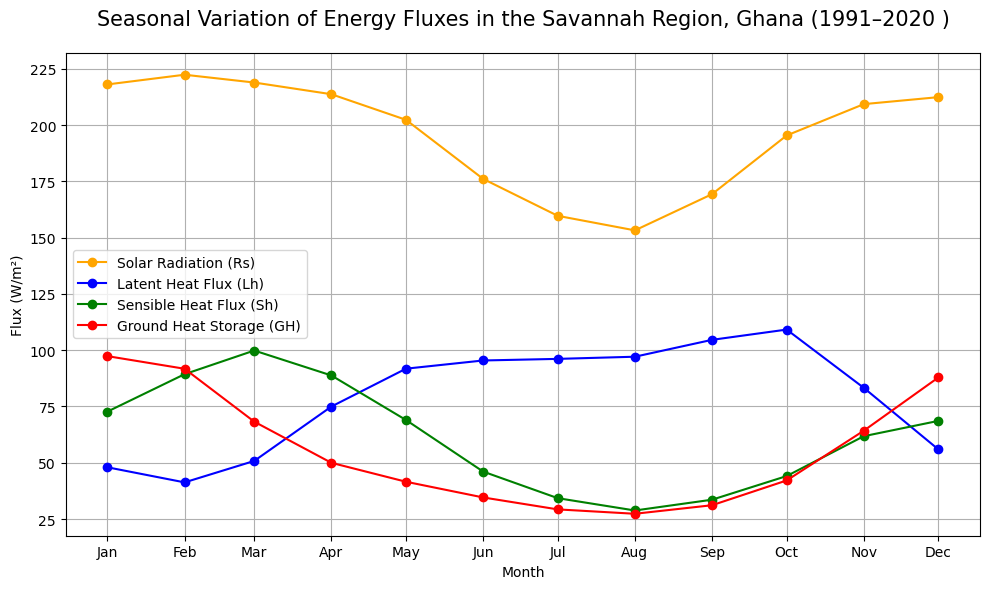

In [17]:


# Load the monthly mean data for each variable
rs_monthly = xr.open_dataset("output_files/rs_monthly.nc")["avg_snswrf"]
lh_monthly = xr.open_dataset("output_files/lh_monthly.nc")["avg_slhtf"] * -1
sh_monthly = xr.open_dataset("output_files/sh_monthly.nc")["avg_ishf"] * -1
gh_monthly = xr.open_dataset("output_files/gh_monthly.nc")["GH"]

# Ensure the data is 1D (12 values, one for each month)
rs_monthly = rs_monthly.mean(dim=["lat", "lon"])
lh_monthly = lh_monthly.mean(dim=["lat", "lon"])
sh_monthly = sh_monthly.mean(dim=["lat", "lon"])
gh_monthly = gh_monthly.mean(dim=["lat", "lon"])


# Create a time series plot
months = pd.date_range(start="2023-01-01", periods=12, freq="MS")  # Dummy dates for plotting

plt.figure(figsize=(10, 6))

# Plot each variable
plt.plot(months, rs_monthly, label="Solar Radiation (Rs)", color="orange", marker="o")
plt.plot(months, lh_monthly, label="Latent Heat Flux (Lh)", color="blue", marker="o")
plt.plot(months, sh_monthly, label="Sensible Heat Flux (Sh)", color="green", marker="o")
plt.plot(months, gh_monthly, label="Ground Heat Storage (GH)", color="red", marker="o")

# Add labels, title, and legend
plt.xlabel("Month")
plt.ylabel("Flux (W/m²)")
plt.title("Seasonal Variation of Energy Fluxes in the Savannah Region, Ghana (1991–2020 )",fontsize=15, pad=20)
plt.xticks(months, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


<summary>
    <h3>Reasons for the Nature of the Plot:</h3>
    <details>
        <p>
            The study area experiences a unimodal rainfall pattern, with rainfall occurring primarily between May and October each year. Annual rainfall records range between 500 mm and 1200 mm [28]. Additionally, the mean monthly temperature in the region varies from 27&deg;C to 36&deg;C [19]. These climatic conditions influence the energy fluxes depicted in the plot.
        </p>
        <p>
            During the rainy season:
            <ul>
                <li>Solar radiation is expected to be lower than in the dry season due to increased cloud cover, which dims incoming solar radiation.</li>
                <li>Latent heat fluxes are expected to rise because of increased evaporation.</li>
                <li>Sensible heat flux is expected to be lower.</li>
                <li>Ground heat storage is expected to decrease during the rainy season and rise again when the rains cease and solar radiation begins to peak.</li>
            </ul>
        </p>
        <p>
            For further insight into the climatology of the area, refer to this research paper: 
            <a href="https://www.researchgate.net/publication/347156768_Rainfall_variabilities_and_droughts_in_the_Savannah_zone_of_Ghana_from_1960-2015" target="_blank">Rainfall Variabilities and Droughts in the Savannah Zone of Ghana from 1960-2015</a>.
        </p>
    </details>
</summary>